### **Task:** Using machine learning algorithms, to create models that predict which passengers survived the Titanic crash.

**Data:**
The training set should be used to build machine learning models. The training set has target variable *survived*.

The test set does not have a target variable. It is used to assess the quality of the models on the platform *[kaggle.com](http://kaggle.com/)*.

**More about the data:** [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data)

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.activations import softmax,tanh,relu,sigmoid
from tensorflow.keras.metrics import Accuracy,Precision,AUC,FalseNegatives,FalsePositives,TrueNegatives,TruePositives, Recall, Precision
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD,Adam,Adamax
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import L1,L2,L1L2
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from livelossplot import PlotLossesKeras
from itertools import permutations,product
import matplotlib.pyplot as plt

1. Load data for training and testing, identify features with missing values.

In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
from math import log

In [2]:
import matplotlib.pyplot as plt

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Features with less non-zero data than the maximum (891) have missing values.

**2.** Let's analyze all the features. For each feature, we will determine:

- Basic statistics (`describe`)
- Number of missing values
- Type of feature (categorical, text, numerical)
- For categorical data, we will determine unique values
- For categorical data, we will plot a bar plot (`plt.bar()`), determine the feature distribution of values
- For numerical features, we will plot a histogram (`plt.hist()`), try different number of bins in the division. Determine the distribution type (uniform, normal...)

Let's display numerical features

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Actually, only Age, SibSp, and Fare are not categorical (numeric) among these.

Other variables, although they have numerical values, are categorical.

Next, let's determine the number of missing values.

In [5]:
-(train.count()-train.count().max()).sum()

866

Also we can tell type of feature with train.info()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


For categorical features, we will show the set of possible values.

In [7]:
print(train["Survived"].unique(),train["Pclass"].unique(),train["Sex"].unique(),train["Embarked"].unique())

[0 1] [3 1 2] ['male' 'female'] ['S' 'C' 'Q' nan]


<BarContainer object of 2 artists>

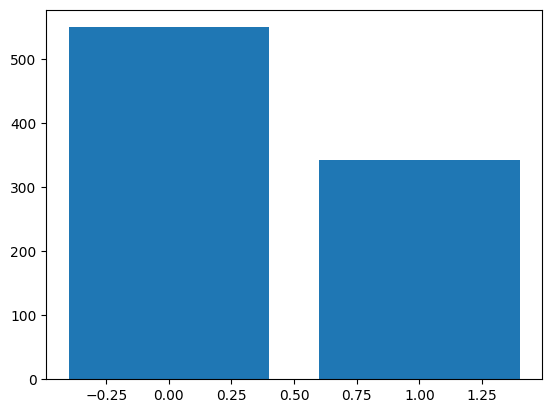

In [8]:
plt.bar(train['Survived'].unique(),train.groupby("Survived").size())

<BarContainer object of 3 artists>

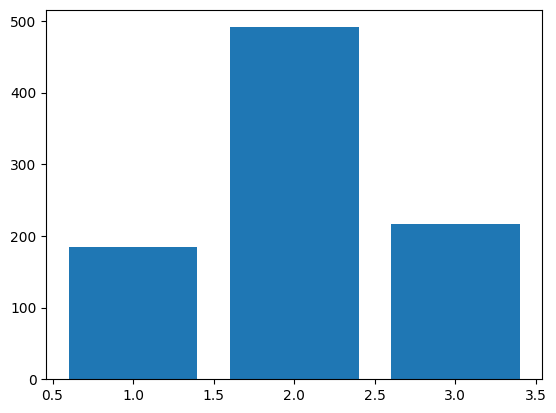

In [9]:
plt.bar(train['Pclass'].unique(),train.groupby("Pclass").size())

<BarContainer object of 2 artists>

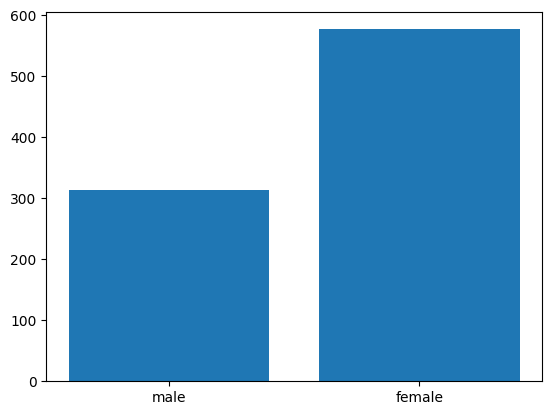

In [10]:
plt.bar(train['Sex'].unique(),train.groupby("Sex").size())

<BarContainer object of 3 artists>

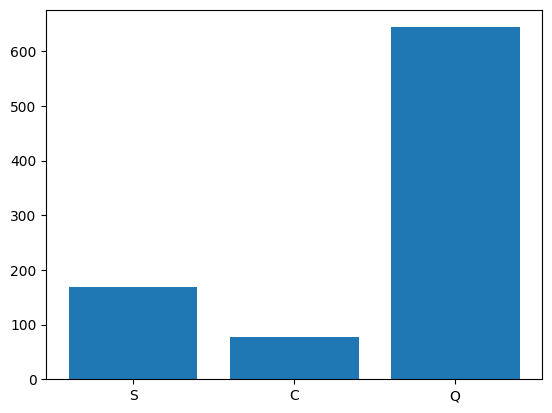

In [11]:
plt.bar(train['Embarked'].unique()[:-1],train.groupby("Embarked").size())

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

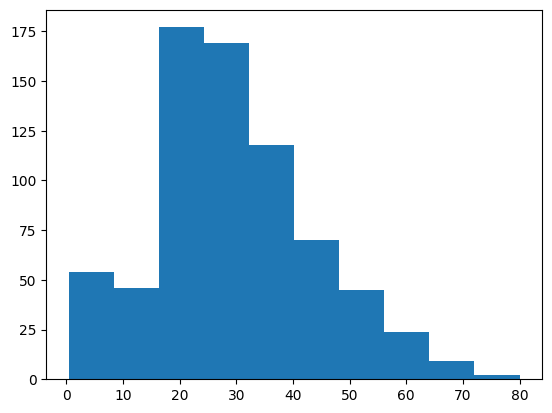

In [12]:
plt.hist(train['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

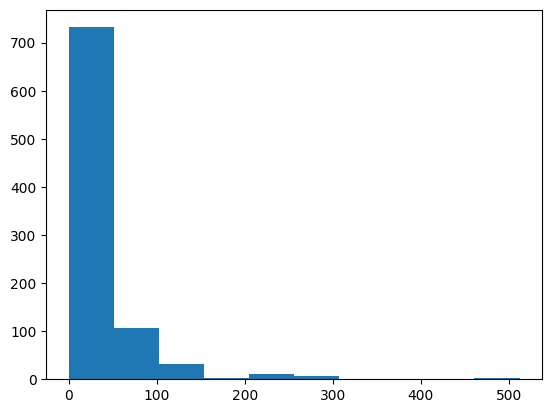

In [13]:
plt.hist(train['Fare'])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

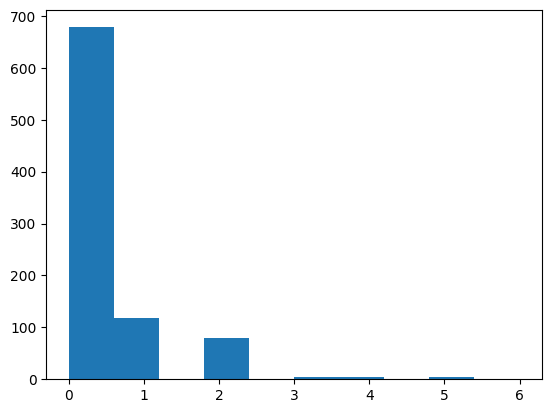

In [14]:
plt.hist(train['Parch'])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

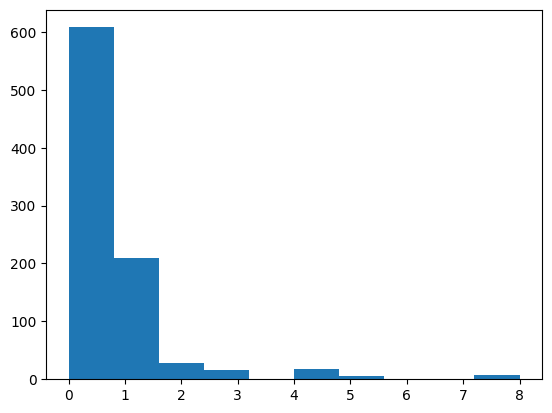

In [15]:
plt.hist(train['SibSp'])

We can see that most of the features are normally distributed, while some have an exponential distribution.

**3.** Data preprocessing
For each feature, it is necessary to:

- Replace missing values
- For categorical text features, obtain categorical numerical features (feature *Sex*). Try `LabelEncoder` and `OneHotEncoder` from sklearn
- Normalize the features

Replacing missing values can be implemented via:

- replacing with mean
- replacing with median
- replacing with mode (most frequent value)
- for categorical features, replacing with the most frequent value or creating a new category "undefined"
- replacing with the next or previous value (`fillna`)

Normalization (*sklearn*):

- `MinMaxScaler`
- `StandardScaler`
- `RobustScaler`

We do it for *train* and *test* data.

In [16]:
from sklearn.preprocessing import LabelEncoder, normalize

{'bodies': [<matplotlib.collections.PolyCollection at 0x2410c30c370>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2410c30c2e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2410c30ca30>,
 'cbars': <matplotlib.collections.LineCollection at 0x2410c30cdf0>}

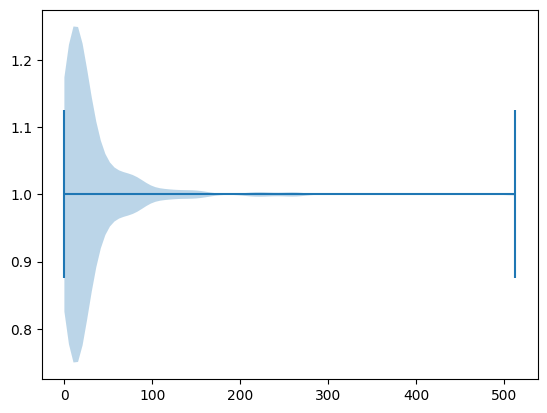

In [17]:
plt.violinplot(train['Fare'],vert=False)

In [18]:
train['Fare'].median()

14.4542

{'bodies': [<matplotlib.collections.PolyCollection at 0x2410c3ec160>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2410c3ec100>,
 'cmins': <matplotlib.collections.LineCollection at 0x2410c3ed000>,
 'cbars': <matplotlib.collections.LineCollection at 0x2410c3ed420>}

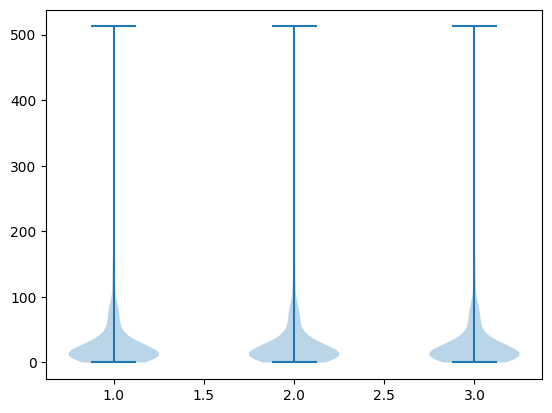

In [19]:
fig, ax = plt.subplots()
ax.violinplot([train['Fare'].fillna(train['Fare'].median()),train['Fare'],train['Fare'].fillna(train['Fare'].mean())])

The above graphs tell us that it doesn't matter whether we replace with median, mode, or mean, it doesn't significantly affect the distribution.

In [20]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

С помощью LabelEncoder-а производим "кодировку" категориальных данных числами

In [21]:
le = LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

In [22]:
train['Age']=train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [23]:
le = LabelEncoder()
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

In [24]:
train = train.drop(columns=['Name','Ticket','Cabin'])
test = test.drop(columns=['Name','Ticket','Cabin'])

In [25]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Next, we normalize the data for further application of ML algorithms to them.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train2 = scaler.fit_transform(train)
test2 = scaler.fit_transform(test)

In [27]:
train2 = pd.DataFrame(train2,columns = train.keys())
test2 = pd.DataFrame(test2,columns = test.keys())

## 

In [28]:
train2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114
887,1.718444,1.266990,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114
888,1.722332,-0.789272,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114
889,1.726220,1.266990,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460


In [29]:
train2['Survived']=train['Survived']

4. We Split the training data into training and validation sets. To evaluate the model's quality, it is necessary to check the resulting model on validation data.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test,y_train,y_test=train_test_split(train2.drop(columns='Survived'),train2['Survived'],random_state=42,stratify=train2['Survived'],test_size=20)

In [32]:
train2.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


**5.**

### We will train the following models on preprocessed data:

- Logistic regression (`LogisticRegression`)
- Support vector machines (`SVC`)
- K-nearest neighbors (`KNeighborsClassifier`)
- Naive Bayes (`GaussianNB`)
- Decision tree (`DecisionTreeClassifier`)
- Random forest (`RandomForestClassifier`)
- Gradient boosting (`GradientBoostingClassifier`)

### For each model, we will measure the metrics obtained on the validation data. We will obtain:

- *Accuracy*
- *Precision*
- *Recall*
- *F1-score*
- *ConfusionMatrix*

### For each model, we will also tune the hyperparameters to achieve the best score on the validation data.

## Logistic Regression ##

In [33]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)

In [34]:
y_pred_LR

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred_LR,y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.62      0.83      0.71         6

    accuracy                           0.80        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.83      0.80      0.81        20



In [36]:
print(confusion_matrix(y_pred_LR,y_test))

[[11  3]
 [ 1  5]]


## SVC  ##

In [37]:
from sklearn.svm import SVC
clf_SVC = SVC().fit(X_train, y_train)
y_pred_SVC = clf_SVC.predict(X_test)

In [38]:
print(classification_report(y_pred_SVC,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.62      1.00      0.77         5

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



In [39]:
print(confusion_matrix(y_pred_SVC,y_test))

[[12  3]
 [ 0  5]]


In [40]:
len('              precision    recall  f1-score   support')

53

## KNeighboursClassifier ##

Note: here and below we will only display accuracy, according to this metric we will tune hyperparameters and rely on how efficient the model is

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred_KNX=neigh.predict(X_test)
    print(i,classification_report(y_pred_SVC,y_test)[203:207])

1 0.85
2 0.85
3 0.85
4 0.85
5 0.85
6 0.85
7 0.85
8 0.85
9 0.85
10 0.85
11 0.85
12 0.85
13 0.85
14 0.85
15 0.85
16 0.85
17 0.85
18 0.85
19 0.85
20 0.85
21 0.85
22 0.85
23 0.85
24 0.85
25 0.85
26 0.85
27 0.85
28 0.85
29 0.85
30 0.85
31 0.85
32 0.85
33 0.85
34 0.85
35 0.85
36 0.85
37 0.85
38 0.85
39 0.85
40 0.85
41 0.85
42 0.85
43 0.85
44 0.85
45 0.85
46 0.85
47 0.85
48 0.85
49 0.85
50 0.85
51 0.85
52 0.85
53 0.85
54 0.85
55 0.85
56 0.85
57 0.85
58 0.85
59 0.85
60 0.85
61 0.85
62 0.85
63 0.85
64 0.85
65 0.85
66 0.85
67 0.85
68 0.85
69 0.85
70 0.85
71 0.85
72 0.85
73 0.85
74 0.85
75 0.85
76 0.85
77 0.85
78 0.85
79 0.85
80 0.85
81 0.85
82 0.85
83 0.85
84 0.85
85 0.85
86 0.85
87 0.85
88 0.85
89 0.85
90 0.85
91 0.85
92 0.85
93 0.85
94 0.85
95 0.85
96 0.85
97 0.85
98 0.85
99 0.85


## Gaussian NB ##

In [43]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(X_train, y_train)
y_pred_GNB=clf_GNB.predict(X_test)

In [44]:
classification_report(y_pred_GNB,y_test)[203:207]

'0.85'

## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier()
clf_DTC.fit(X_train, y_train)
y_pred_DTC=clf_DTC.predict(X_test)

In [46]:
classification_report(y_pred_DTC,y_test)[203:207]

'0.85'

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC = RandomForestClassifier()
clf_RFC.fit(X_train, y_train)
y_pred_RFC=clf_RFC.predict(X_test)

In [48]:
classification_report(y_pred_RFC,y_test)[203:207]

'0.90'

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier()
clf_GBC.fit(X_train, y_train)
y_pred_GBC=clf_GBC.predict(X_test)

In [50]:
classification_report(y_pred_GBC,y_test)[203:207]

'0.85'

**6.**

### Submit the best result on [kaggle.com](http://kaggle.com/)

The Random Forest Classifier turned out to be the best in terms of accuracy, so we will submit it to Kaggle.

One can obtain the submission file with the following code:

In [51]:
ypred_Xnew = clf_RFC.predict(test2).astype(int)

submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                             'Survived': ypred_Xnew})
submission.to_csv("submission.csv", index=False)

Obtained a score of 0.78708

## Let's try to find the way to improve our score

In [52]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [53]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [54]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode().max())

OneHotEncoder instead of LabelEncoder is used below for some of the categorical features

In [55]:
from sklearn import preprocessing
import numpy as np
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(train['Embarked']).reshape(-1,1))

In [56]:
pd.DataFrame(tmp,columns=train['Embarked'].unique())

,S,C,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [57]:
train3 = pd.concat([train.drop(columns=['Embarked']),pd.DataFrame(tmp,columns=train['Embarked'].unique())],axis=1)

In [58]:
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(train['Sex']).reshape(-1,1))

In [59]:
train3 = pd.concat([train3.drop(columns=['Sex']),pd.DataFrame(tmp,columns=train3['Sex'].unique())],axis=1)

In [60]:
train3

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,Q,male,female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0.0,0.0,1.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0.0,0.0,1.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0.0,0.0,1.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1.0,0.0,0.0,0.0,1.0


We may notice above that every Name has a certain status before it like Mr,Mrs, Miss etc. It can be parsed and used as a feature

In [61]:
train3.Name = [i.split(',')[1].split('.')[0] for i in train3['Name']]

In [62]:
train3 = train3.drop(columns=['Cabin','Ticket', 'PassengerId'])

In [63]:
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(train3['Pclass']).reshape(-1,1))
train3 = pd.concat([train3.drop(columns=['Pclass']),pd.DataFrame(tmp,columns=['p'+str(i) for i in train3['Pclass'].unique()])],axis=1)

In [64]:
enc = preprocessing.LabelEncoder()
temp = enc.fit_transform(np.array(train3['Name']))
train3.Name = temp

In [65]:
train3['Fare']=train3['Fare'].fillna(train3['Fare'].mean())

In [66]:
test.Embarked = test.Embarked.fillna(train.Embarked.mode().max())
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(test['Embarked']).reshape(-1,1))
test3 = pd.concat([test.drop(columns=['Embarked']),pd.DataFrame(tmp,columns=test['Embarked'].unique())],axis=1)
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(test3['Sex']).reshape(-1,1))
test3 = pd.concat([test3.drop(columns=['Sex']),pd.DataFrame(tmp,columns=test3['Sex'].unique())],axis=1)
test3.Name = [i.split(',')[1].split('.')[0] for i in test3['Name']]
enc = preprocessing.OneHotEncoder(sparse=False)
tmp = enc.fit_transform(np.array(test3['Pclass']).reshape(-1,1))
test3 = pd.concat([test3.drop(columns=['Pclass']),pd.DataFrame(tmp,columns=['p'+str(i) for i in test3['Pclass'].unique()])],axis=1)
enc = preprocessing.LabelEncoder()
temp = enc.fit_transform(np.array(test3['Name']))
test3.Name = temp
test3['Fare']=test3['Fare'].fillna(test3['Fare'].mean())

In [67]:
test3

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,C,male,female,p3,p2,p1
0,892,5,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,893,6,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,894,5,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,5,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,896,6,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,5,NaN,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,1307,5,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
416,1308,5,NaN,0,0,359309,8.0500,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [68]:
test3 = test3.drop(columns=['Ticket','Cabin', 'PassengerId'])

In [69]:
test3.keys()

Index(['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'C', 'male',
       'female', 'p3', 'p2', 'p1'],
      dtype='object')

In [70]:
train3.keys()

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q',
       'male', 'female', 'p3', 'p1', 'p2'],
      dtype='object')

In [71]:
train3['Age']=train3['Age'].fillna(train3['Age'].median())
test3['Age'] = test3['Age'].fillna(test3['Age'].median())

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train3n = scaler.fit_transform(train3)
test3n = scaler.fit_transform(test3)

In [73]:
train3n = pd.DataFrame(train3n,columns = train3.keys())
test3n = pd.DataFrame(test3n,columns = test3.keys())

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(train3n.drop(columns='Survived'),train3n['Survived'],random_state=42,stratify=train3['Survived'],test_size=20)

In [75]:
y_train.astype(np.int32)

364    0
712    1
693    0
473    1
10     1
      ..
736    0
462    0
31     1
204    1
27     0
Name: Survived, Length: 871, dtype: int32

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
clf_GBC1 = GradientBoostingClassifier()
clf_GBC1.fit(X_train, y_train.astype(np.int32))
y_pred_GBC=clf_GBC1.predict(X_test)
print(classification_report(y_pred_GBC,y_test.astype(np.int32)))
print(confusion_matrix(y_pred_GBC,y_test.astype(np.int32)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

[[11  1]
 [ 1  7]]


In [78]:
param_grid = {'learning_rate': [i/100 for i in range(1,110,1)]}
base_estimator = GradientBoostingClassifier()
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=500,random_state = 16).fit(X_train, y_train.astype(np.int32))
print(sh.best_estimator_)

GradientBoostingClassifier(learning_rate=0.18, n_estimators=448)


In [80]:
clf_GBC = GradientBoostingClassifier(learning_rate=0.18, n_estimators=448)
clf_GBC.fit(X_train, y_train.astype(np.int32))
y_pred_GBC=clf_GBC.predict(X_test)
print(classification_report(y_pred_GBC,y_test.astype(np.int32)))
print(confusion_matrix(y_pred_GBC,y_test.astype(np.int32)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

[[10  1]
 [ 2  7]]


In [81]:

from sklearn.ensemble import RandomForestClassifier
clf_RFC = RandomForestClassifier()
clf_RFC.fit(X_train, y_train.astype(np.int32))
y_pred_RFC=clf_RFC.predict(X_test)
classification_report(y_pred_RFC,y_test.astype(np.int32))[203:207]


'0.80'

In [82]:
base_estimator = RandomForestClassifier()
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train, y_train.astype(np.int32))
print(sh.best_estimator_)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=24)


In [83]:
from sklearn.tree import DecisionTreeClassifier
clf_RFC = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=24)
clf_RFC.fit(X_train, y_train.astype(np.int32))
y_pred_DTC=clf_RFC.predict(X_test)
classification_report(y_pred_RFC,y_test.astype(np.int32))[203:207]

'0.80'

In [84]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0).fit(X_train, y_train.astype(np.int32))
y_pred_LR = clf_LR.predict(X_test)
classification_report(y_pred_RFC,y_test.astype(np.int32))[203:207]

'0.80'

In [88]:
ypred_Xnew = clf_GBC1.predict(test3n).astype(int)

submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                             'Survived': ypred_Xnew})
submission.to_csv("submission1.csv", index=False)

C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


***Score is 0.78229 which is less then primary so these corrections didn't help let's try to set Neural Network for this task***

In [145]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

1. It is necessary to expand the dataset with new features. For example, add polynomial features (sklearn.preprocessing.PolynomialFeatures) and create new features based on SibSp, Age, Name, Pclass, Parch, Ticket, and others (for example, from the Age feature, you can create a categorical feature, such as 1-20 - 0, 21-40 - 1, 41-100 - 3; parse the Name feature to extract information about a person's status).

In [146]:
train['Status'] = [i.split(',')[1].split('.')[0] for i in train['Name']]
test['Status'] = [i.split(',')[1].split('.')[0] for i in test['Name']]

In [147]:
train['AgeC']=train['Age']//20
test['AgeC']=test['Age']//20

In [148]:
PasId = test.PassengerId

In [149]:
le = LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])



test['Fare']=test['Fare'].fillna(test['Fare'].mean())
train['AgeC']=train['AgeC'].fillna(train['AgeC'].median())
test['AgeC'] = test['AgeC'].fillna(test['AgeC'].median())

le = LabelEncoder()
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

train['CabinC'] = [str(i)[0] for i in train.Cabin]
test['CabinC'] = [str(i)[0] for i in test.Cabin]

train = train.drop(columns=['Name','Ticket','Age','Cabin','PassengerId'])
test = test.drop(columns=['Name','Ticket','Age','Cabin','PassengerId'])

le = LabelEncoder()
train['Status']=le.fit_transform(train['Status'])
test['Status'] = le.fit_transform(test['Status'])

le = LabelEncoder()
train['CabinC']=le.fit_transform(train['CabinC'])
test['CabinC'] = le.fit_transform(test['CabinC'])



In [150]:
poly_cols = ['Fare','Status','CabinC','Pclass']
poly = PolynomialFeatures(2,interaction_only=True,include_bias=False)
tmp = poly.fit_transform(train[poly_cols])
train = train.drop(columns=poly_cols,axis=1)
train[poly.get_feature_names_out()] = tmp
tmp = poly.fit_transform(test[poly_cols])
test = test.drop(columns=poly_cols,axis=1)
test[poly.get_feature_names_out()] = tmp

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train2 = scaler.fit_transform(train)
test2 = scaler.fit_transform(test)

In [152]:
train2 = pd.DataFrame(train2,columns = train.keys())
test2 = pd.DataFrame(test2,columns = test.keys())

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(train.drop(columns='Survived'),train['Survived'],random_state=42,stratify=train['Survived'],test_size=20)

### 2. Data normalization is necessary. For numerical data, use one of the strategies (MinMax, StandardScaler, etc.). For categorical data, apply OneHotEncoder. Split the resulting dataset into train and validation sets.

**3.** Using the Keras framework, we will implement a single-layer and multi-layer neural network model.

Let's try:

1. Embedding different activation functions in layers (ReLU, sigmoid, etc.).
2. Train models on layers with and without Dropout.
3. Embed regularization in layers (L1, L2, L1L2).
4. Train models with different loss optimizer Adam.
5. Train models with learning_rate tuning in loss optimizers. Try the step decay technique.
6. Train models with different number of epochs. Try the callback - EarlyStopping.

For each experiment, it is necessary to:

1. Build loss graphs.

Draw history (the returned list of the fit method), or for real-time training monitoring, you can use callback - PlotLossesKeras (from livelossplot import PlotLossesKeras). In the fit function, specify callbacks=[PlotLossesKeras()].

1. Take metrics.

We can also track metrics during training: metrics=[tf.keras.metrics.Precision(), ..].

It is very important not to allow models to overfit. To do this, it is necessary:

1. Since there are not so many data, do not make too many layers (we limit ourselves to 2-3 layers).
2. Do not specify too large a number of epochs (10-20-30). On the loss function graph, you can track at which epoch the training data begins to "memorize" the data, and on the validation loss graph, the loss function starts to increase. To do this, apply early stopping of training - EarlyStopping.
3. Apply Dropout, L1/L2/L1L2 regularization.

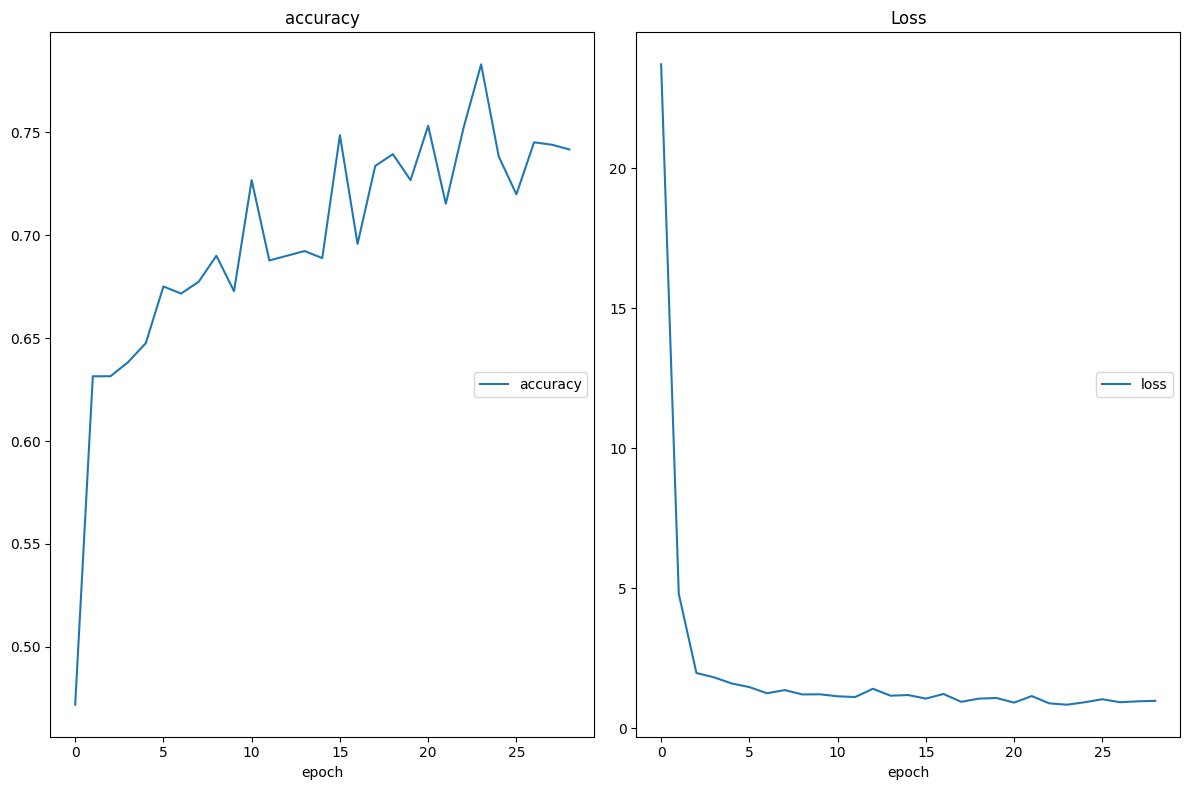

accuracy
	accuracy         	 (min:    0.472, max:    0.783, cur:    0.742)
Loss
	loss             	 (min:    0.844, max:   23.703, cur:    0.982)


In [104]:
model1 = Sequential(
    [
        Dense(units=16,input_dim=X_train.shape[1], activation=relu, kernel_regularizer=L1(0.01)),
        Dense(units=1, activation=sigmoid),
        
    ]   
)
initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)
model1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
callback = EarlyStopping(monitor='accuracy', patience=5)
history = model1.fit(X_train, y_train, epochs=250, batch_size=5,verbose=0,callbacks=[PlotLossesKeras(),callback])

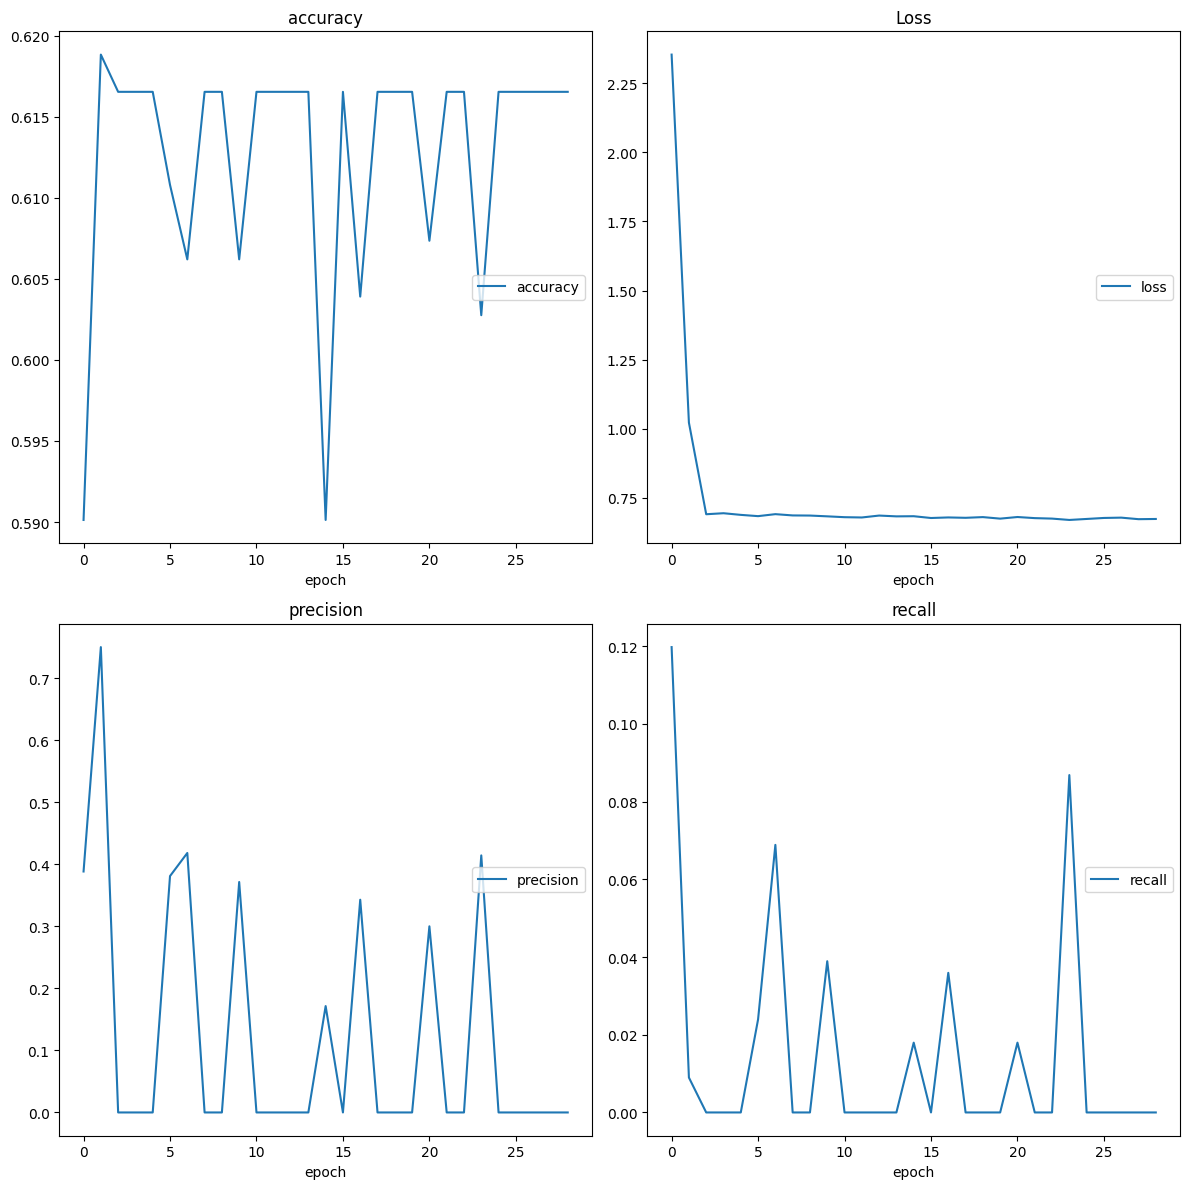

accuracy
	accuracy         	 (min:    0.590, max:    0.619, cur:    0.617)
Loss
	loss             	 (min:    0.670, max:    2.354, cur:    0.674)
precision
	precision        	 (min:    0.000, max:    0.750, cur:    0.000)
recall
	recall           	 (min:    0.000, max:    0.120, cur:    0.000)
1/1 [==============================] - 0s 93ms/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.00      0.00      0.00         0

    accuracy                           0.60        20
   macro avg       0.50      0.30      0.37        20
weighted avg       1.00      0.60      0.75        20



C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [105]:
model2 = Sequential(
    [
        Dense(units=16,input_dim=X_train.shape[1], activation=relu),
        Dense(units=64, activation=relu,kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),
        Dense(units=1, activation=sigmoid)
    ]   
)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = lr_schedule), metrics=['accuracy','Recall','Precision'])
callback = EarlyStopping(monitor='loss', patience=5)
history = model2.fit(X_train, y_train, epochs=30, batch_size=5,verbose=0,callbacks=[PlotLossesKeras(),callback])
tmp = model2.predict(X_test).reshape(1,-1)[0]
predict = np.array(tmp>0.5,dtype='int32')
print(classification_report(predict,y_test.astype(np.int32)))

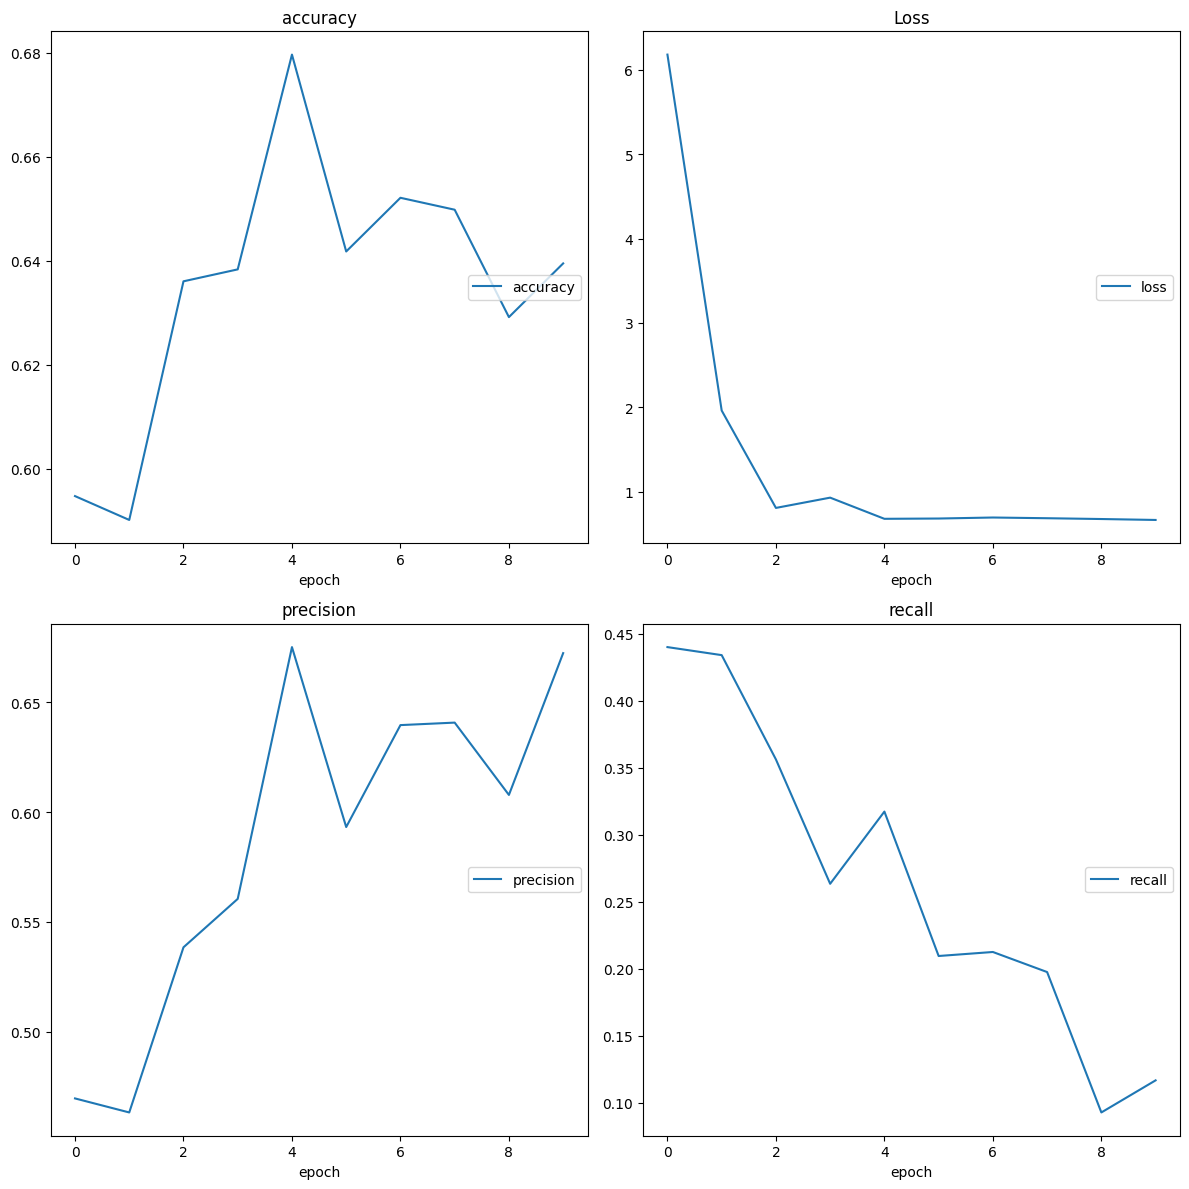

accuracy
	accuracy         	 (min:    0.590, max:    0.680, cur:    0.639)
Loss
	loss             	 (min:    0.666, max:    6.179, cur:    0.666)
precision
	precision        	 (min:    0.463, max:    0.675, cur:    0.672)
recall
	recall           	 (min:    0.093, max:    0.440, cur:    0.117)


In [163]:
model3 = Sequential(
    [
        Dense(units=128,input_dim=X_train.shape[1], activation=relu,kernel_regularizer=L1L2(1e-4,1e-5)),
        Dropout(0.3),
        Dense(units=32, activation=relu,kernel_regularizer=L1(1e-4)),
        Dropout(0.3),
        Dense(units=1,activation=sigmoid)
    ]   
)
initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)
model3.compile(loss='binary_crossentropy', optimizer=Adam(),  metrics=['accuracy','Recall','Precision'])
callback = EarlyStopping(monitor='accuracy', patience=5)
history = model3.fit(X_train, y_train, epochs=250, batch_size=5,verbose=0,callbacks=[PlotLossesKeras(),callback])

In [159]:
tmp = model1.predict(X_test).reshape(1,-1)[0]
predict = np.array(tmp>0.5,dtype='int32')
print(classification_report(predict,y_test.astype(np.int32)))

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



In [164]:
tmp = model3.predict(X_test).reshape(1,-1)[0]
predict3 = np.array(tmp>0.5,dtype='int32')
print(classification_report(predict3,y_test.astype(np.int32)))

1/1 [==============================] - 0s 82ms/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.00      0.00      0.00         0

    accuracy                           0.60        20
   macro avg       0.50      0.30      0.37        20
weighted avg       1.00      0.60      0.75        20



C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\merko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [155]:
ypred_Xnew = np.array(model1.predict(test2).reshape(1,-1)[0]>0.5,dtype='int32')

submission = pd.DataFrame({ 'PassengerId': PasId,
                             'Survived': ypred_Xnew})
submission.to_csv("submission1.csv", index=False)

14/14 [==============================] - 0s 997us/step


In [156]:
ypred_Xnew = np.array(model2.predict(test2).reshape(1,-1)[0]>0.5,dtype='int32')

submission = pd.DataFrame({ 'PassengerId': PasId,
                             'Survived': ypred_Xnew})
submission.to_csv("submission.csv", index=False)

14/14 [==============================] - 0s 1ms/step


These got me even lower with the score of 0.7003 and 0.67464 so as a solution I am going to stick with Random Forest Classifier for this task